# Settings

In [1]:
plotpars = {'axes.labelsize': 18,
            'axes.linewidth': 1.,
            'figure.figsize': (7.,5.),
            'font.size': 12,
            'legend.frameon': True,
            'legend.framealpha': 0.85,
            'legend.edgecolor': 'black',
            'legend.loc': 'best',
            'legend.fontsize': 12,
            'mathtext.fontset': 'stixsans',
            'savefig.bbox': 'tight',
            'xtick.labelsize': 18,
            'ytick.labelsize': 18,
           }

# Libraries

In [2]:
# usual libraries -------------------------------------------------------------------------------------------------
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import astropy.io.fits   as pf
import astropy.constants as ct
import os
import time
import scipy.interpolate as sci
import ipywidgets        as widgets

In [3]:
# ppxf separately -------------------------------------------------------------------------------------------------
import ppxf.miles_util   as lib  # MILES library embedded in ppxf
import ppxf.ppxf_util    as util
import ppxf              as ppxf_module
from ppxf.ppxf           import ppxf
from ppxf.ppxf_util      import log_rebin

# Data

In [4]:
data = pd.read_csv('../../Catalogue/Match07_smalldoubleclean_emlines.csv')

In [5]:
output_path = '../../LargeFilesResults/SEDFitting/ResultsRP'

In [6]:
uvup_data = data.loc[data['UV_CLASS_YI2011']=='UV_UPTURN']

In [7]:
target_sample = uvup_data[uvup_data['WHAN_CLASS']=='Retired/Passive']

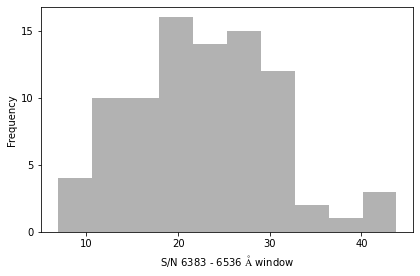

In [8]:
plt.hist(target_sample['SN'], bins=10, color='gray', alpha=0.6)
plt.xlabel(r"S/N 6383 - 6536 $\rm{\AA}$ window")
plt.ylabel(r"Frequency")
plt.rcParams.update(plotpars)
plt.tight_layout()
plt.savefig('../../LargeFilesResults/SEDFitting/ResultsRP/s2n_distribution.pdf')
plt.show()

# pPXF

In [9]:
ppxf_dir     = os.path.dirname(os.path.realpath(ppxf_module.__file__))
miles_lib    = ppxf_dir+'/miles_models/Mun1.30*.fits'
seds_path    = './../../../../GAMADR3_SPECTRA/DATABASE/'
light_speed  = float(str(ct.c.to('km/s')).split(' ')[0])            # selecting the numerical values 
                                                                    # (must be in km/s)
gama_resol   = 1300.

In [10]:
seds_list = []
for i in target_sample['SPECID']: seds_list.append(i+'.fit')

In [11]:
bar = widgets.IntProgress(value=0, min=0, max=len(seds_list)+1, step=0.5, description='pPXF:', 
                          orientation='horizontal')
display(bar)

IntProgress(value=0, description='pPXF:', max=88)

In [12]:
palette      = ['#ef8a62','#f7f7f7','#67a9cf']
transparency = 0.8
lw           = 2.

In [13]:
# Fit (V, sig, h3, h4) moments=4 for the stars; (V, sig) moments=2 for the two gas kinematic components
moments        = [4, 2, 2]
# degree         = -1        # Additive Legendre polynomial degrees
degree         = 10
mdegree        = 50        # Multiplicative Legendre polynomial degrees
regul_err      = 0.013     # Desired regularization error -- TODO: MUST CHECK WHY 0.013
tied_balmer    = True
limit_doublets = False
stellar_comp_w = [0]        # weight of the stellar component
balmer_comp_w  = [1]        # weight of the balmer emission lines
forbid_comp_w  = [2]        # weight of the forbidden lines
# wl_min         = 3540       # MILES RANGE MIN
# wl_max         = 7409       # MILES RANGE MAX
wl_min = 4350            # removing the bluest part of the spectra in order to mitigate noise effects
wl_max = 7409

In [14]:
mean_age   = ['<logAge>']
mean_metal = ['<[M/H]>']
mass2light = ['MASS2LIGHT_R']
ids        = ['CATAID']
redshifts  = ['Z']

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ppxf/miles_util.py:169: RuntimeWarning: invalid value encountered in sqrt
  FWHM_dif = np.sqrt(FWHM_gal**2 - FWHM_tem**2)


Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d' '[OI]6300_d']


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     47246       375    -0.008    -0.003
 comp.  1:     47220       706
 comp.  2:     47496       177
Gas Reddening E(B-V): 0.000
chi2/DOF: 0.01079
method = capfit; Jac calls: 19; Func calls: 1146; Status: 3
linear_method = nnls; Nonzero Templates (>0.1%):  7 / 155
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1       Unknown      7.086       7.5   47220   706
Comp:  2       Unknown      1.277       7.9   47496   177
Comp:  2       Unknown          0       7.7   47496   177
Comp:  2       Unknown          0       4.2   47496   177
Comp:  2       Unknown          0       2.9   47496   177
---------------------------------------------------------
Weighted <logAge> [yr]: 7.88
Weighted <[M/H]>: -1.15
Weighted <logAge> [yr]: 7.88
Weighted <[M/H]>: -1.15


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


M/L_r: 0.1576
Current $\chi^2$: 0.0108
Elapsed time in PPXF: 6.02 [min]


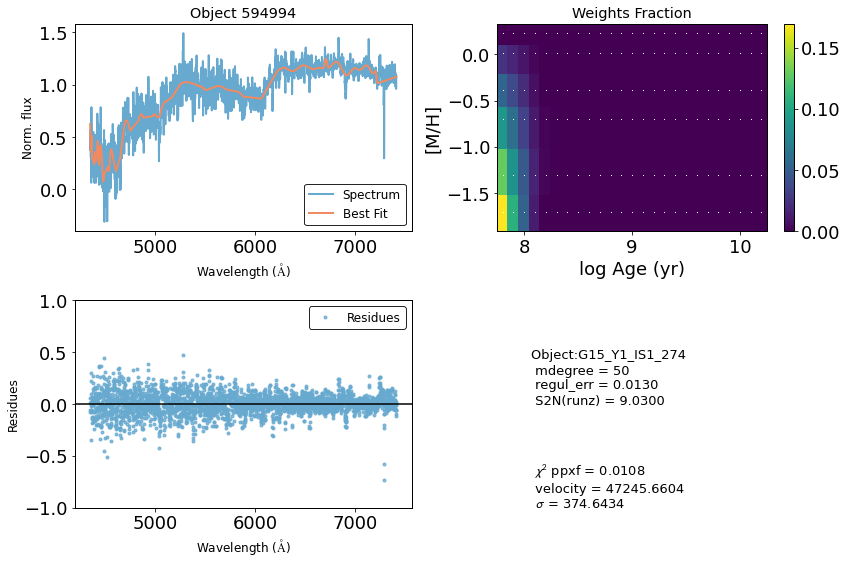

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ppxf/miles_util.py:169: RuntimeWarning: invalid value encountered in sqrt
  FWHM_dif = np.sqrt(FWHM_gal**2 - FWHM_tem**2)


Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d']


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     43938       330    -0.008     0.006
 comp.  1:     43877       180
 comp.  2:     43892       301
Gas Reddening E(B-V): 10.000
chi2/DOF: 0.005638
method = capfit; Jac calls: 9; Func calls: 553; Status: 3
linear_method = nnls; Nonzero Templates (>0.1%):  2 / 153
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1       Unknown          0       2.2   43877   180
Comp:  2       Unknown    0.01422       4.8   43892   301
Comp:  2       Unknown     0.6102       3.9   43892   301
---------------------------------------------------------
Weighted <logAge> [yr]: 9.65
Weighted <[M/H]>: -1.13
Weighted <logAge> [yr]: 9.65
Weighted <[M/H]>: -1.13
M/L_r: 0.9213
Current $\chi^2$: 0.0056
Elapsed time in PPXF: 4.50 [min]


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


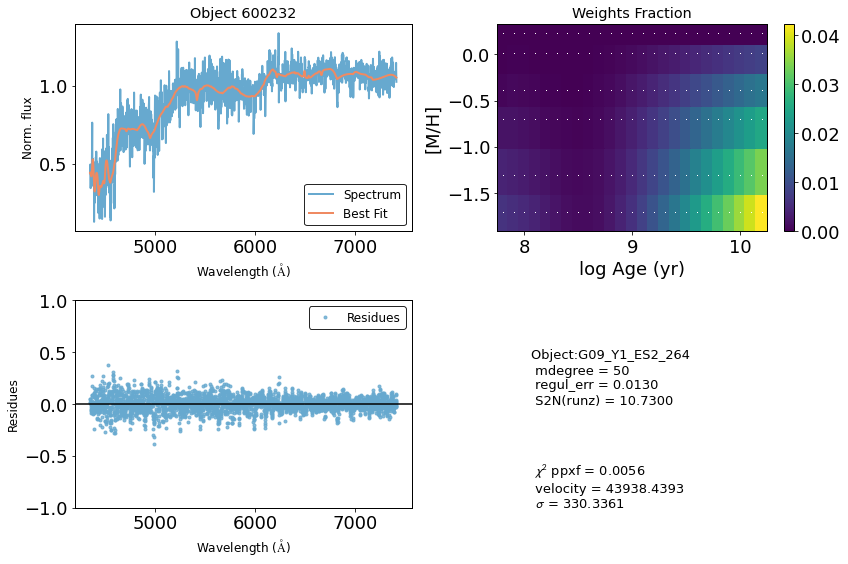

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ppxf/miles_util.py:169: RuntimeWarning: invalid value encountered in sqrt
  FWHM_dif = np.sqrt(FWHM_gal**2 - FWHM_tem**2)


Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d']


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     37769       377     0.000     0.004
 comp.  1:     37943       346
 comp.  2:     37886       116
Gas Reddening E(B-V): 8.523
chi2/DOF: 0.005676
method = capfit; Jac calls: 13; Func calls: 787; Status: 2
linear_method = nnls; Nonzero Templates (>0.1%):  2 / 153
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1       Unknown      0.935       2.8   37943   346
Comp:  2       Unknown     0.3593       3.3   37886   116
Comp:  2       Unknown          0       2.2   37886   116
---------------------------------------------------------
Weighted <logAge> [yr]: 9.65
Weighted <[M/H]>: -0.191
Weighted <logAge> [yr]: 9.65
Weighted <[M/H]>: -0.191
M/L_r: 1.66
Current $\chi^2$: 0.0057
Elapsed time in PPXF: 5.75 [min]


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


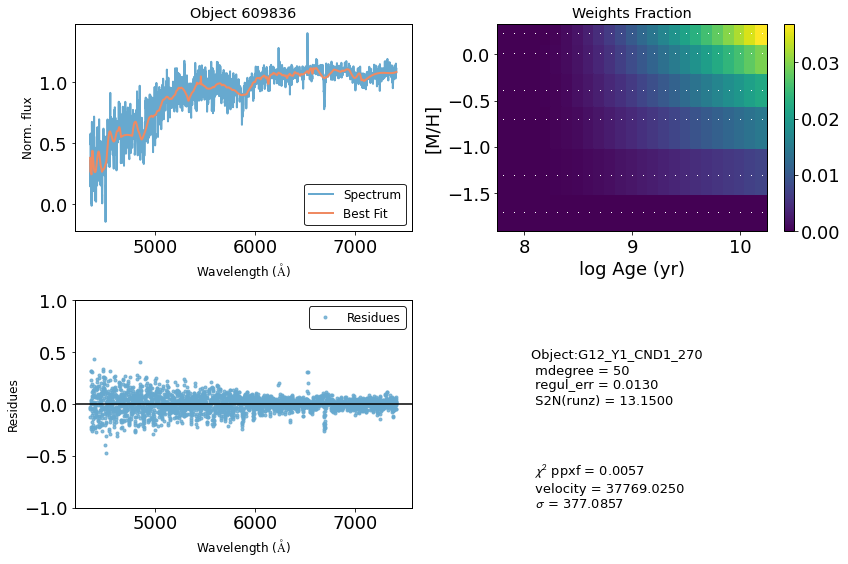

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ppxf/miles_util.py:169: RuntimeWarning: invalid value encountered in sqrt
  FWHM_dif = np.sqrt(FWHM_gal**2 - FWHM_tem**2)


Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d']


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     39900       520     0.017    -0.018
 comp.  1:     39355       119
 comp.  2:     39147       180
Gas Reddening E(B-V): 0.000
chi2/DOF: 0.01268
method = capfit; Jac calls: 12; Func calls: 725; Status: 3
linear_method = nnls; Nonzero Templates (>0.1%):  23 / 153
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1       Unknown     0.7151       3.4   39355   119
Comp:  2       Unknown          0       3.9   39147   180
Comp:  2       Unknown          0       2.7   39147   180
---------------------------------------------------------
Weighted <logAge> [yr]: 7.9
Weighted <[M/H]>: -1.1
Weighted <logAge> [yr]: 7.9
Weighted <[M/H]>: -1.1
M/L_r: 0.1587
Current $\chi^2$: 0.0127
Elapsed time in PPXF: 5.34 [min]


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


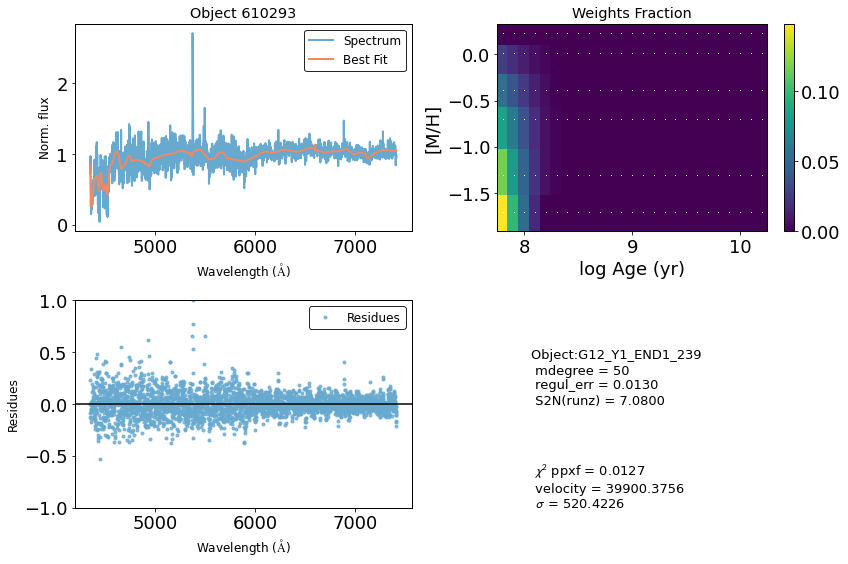

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ppxf/miles_util.py:169: RuntimeWarning: invalid value encountered in sqrt
  FWHM_dif = np.sqrt(FWHM_gal**2 - FWHM_tem**2)


Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     66980       211    -0.033    -0.033
 comp.  1:     66973       180
 comp.  2:     66988       188
Gas Reddening E(B-V): 10.000
chi2/DOF: 0.0101
method = capfit; Jac calls: 1; Func calls: 66; Status: 3
linear_method = nnls; Nonzero Templates (>0.1%):  1 / 154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1       Unknown          0       2.1   66973   180
Comp:  2       Unknown          0       6.8   66988   188
Comp:  2       Unknown      1.736       6.9   66988   188
Comp:  2       Unknown          0       3.7   66988   188
---------------------------------------------------------
Weighted <logAge> [yr]: 9.94
Weighted <[M/H]>: -0.193
Weighted <logAge> [yr]: 9.94
Weighted <[M/H]>: -0.193
M/L_r: 3.609
Current $\chi^2$: 0.0101
Elapsed time in PPXF: 0.50 [min]


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


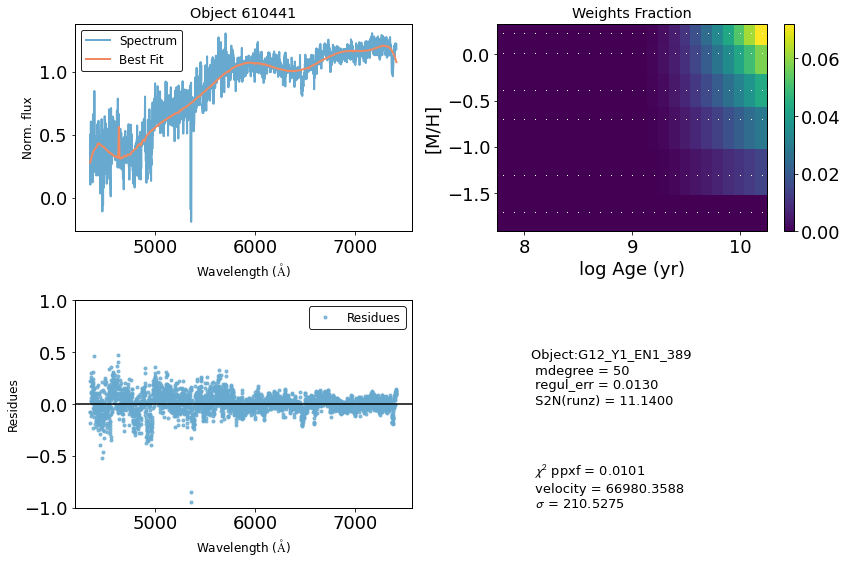

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ppxf/miles_util.py:169: RuntimeWarning: invalid value encountered in sqrt
  FWHM_dif = np.sqrt(FWHM_gal**2 - FWHM_tem**2)


Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     35259       314     0.008    -0.015
 comp.  1:     34793       131
 comp.  2:     34427       128
Gas Reddening E(B-V): 10.000
chi2/DOF: 0.0191
method = capfit; Jac calls: 15; Func calls: 908; Status: 3
linear_method = nnls; Nonzero Templates (>0.1%):  2 / 154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1       Unknown      0.104         2   34793   131
Comp:  2       Unknown     0.3269       3.1   34427   128
Comp:  2       Unknown          0       2.5   34427   128
Comp:  2       Unknown      1.376       2.1   34427   128
---------------------------------------------------------
Weighted <logAge> [yr]: 9.83
Weighted <[M/H]>: -0.784
Weighted <logAge> [yr]: 9.83
Weighted <[M/H]>: -0.784
M/L_r: 2.026
Current $\chi^2$: 0.0191
Elapsed time in PPXF: 7.27 [min]


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


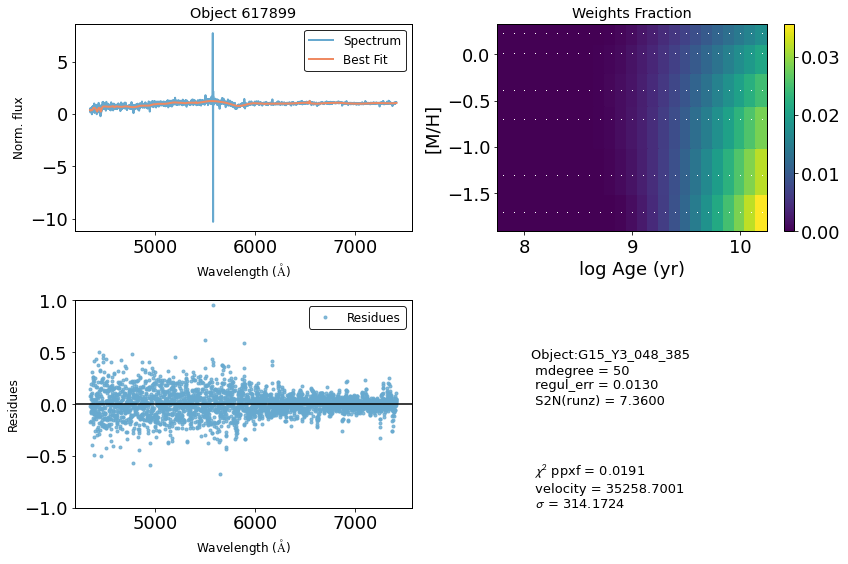

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ppxf/miles_util.py:169: RuntimeWarning: invalid value encountered in sqrt
  FWHM_dif = np.sqrt(FWHM_gal**2 - FWHM_tem**2)


Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     57966       923    -0.040     0.058
 comp.  1:     58662       220
 comp.  2:     58562       290
Gas Reddening E(B-V): -0.000
chi2/DOF: 0.01725
method = capfit; Jac calls: 16; Func calls: 967; Status: 2
linear_method = nnls; Nonzero Templates (>0.1%):  70 / 154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1       Unknown          0       5.9   58662   220
Comp:  2       Unknown     0.1696        13   58562   290
Comp:  2       Unknown          0        13   58562   290
Comp:  2       Unknown      1.739       5.7   58562   290
---------------------------------------------------------
Weighted <logAge> [yr]: 9.86
Weighted <[M/H]>: -0.587
Weighted <logAge> [yr]: 9.86
Weighted <[M/H]>: -0.587
M/L_r: 2.345
Current $\chi^2$: 0.0173
Elapsed time in PPXF: 7.99 [min]


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


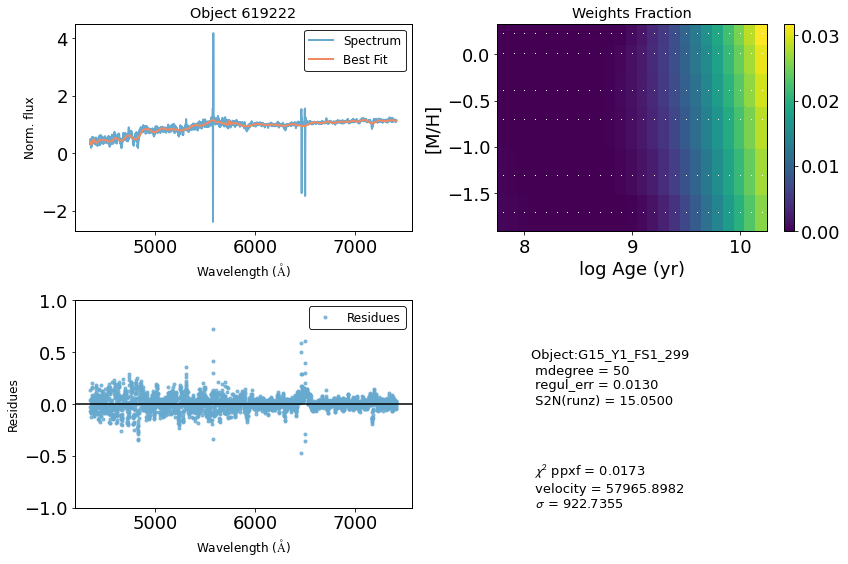

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ppxf/miles_util.py:169: RuntimeWarning: invalid value encountered in sqrt
  FWHM_dif = np.sqrt(FWHM_gal**2 - FWHM_tem**2)


Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     49584       180     0.000     0.000
 comp.  1:     49584       180
 comp.  2:     49584       180
Gas Reddening E(B-V): 0.000
chi2/DOF: 0.0321
method = capfit; Jac calls: 1; Func calls: 67; Status: 3
linear_method = nnls; Nonzero Templates (>0.1%):  5 / 154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1       Unknown          0       3.6   49584   180
Comp:  2       Unknown          0       6.8   49584   180
Comp:  2       Unknown          0       6.9   49584   180
Comp:  2       Unknown          0       4.7   49584   180
---------------------------------------------------------
Weighted <logAge> [yr]: 7.88
Weighted <[M/H]>: -1.68
Weighted <logAge> [yr]: 7.88
Weighted <[M/H]>: -1.68
M/L_r: 0.1744
Current $\chi^2$: 0.0321
Elapsed time in PPXF: 0.44 [min]


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


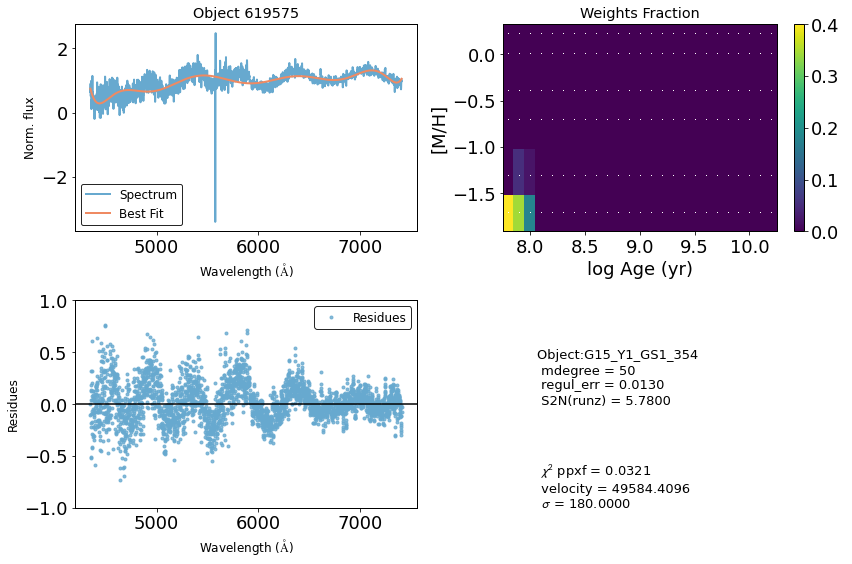

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ppxf/miles_util.py:169: RuntimeWarning: invalid value encountered in sqrt
  FWHM_dif = np.sqrt(FWHM_gal**2 - FWHM_tem**2)


Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     53164       578     0.006    -0.011
 comp.  1:     52874       187
 comp.  2:     53022         1
Gas Reddening E(B-V): 3.229
chi2/DOF: 0.02962
method = capfit; Jac calls: 13; Func calls: 789; Status: 3
linear_method = nnls; Nonzero Templates (>0.1%):  2 / 154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1       Unknown    0.02907       1.6   52874   187
Comp:  2       Unknown          0         9   53022     1
Comp:  2       Unknown      2.311       8.8   53022     1
Comp:  2       Unknown      1.362       3.1   53022     1
---------------------------------------------------------
Weighted <logAge> [yr]: 9.48
Weighted <[M/H]>: -0.812
Weighted <logAge> [yr]: 9.48
Weighted <[M/H]>: -0.812
M/L_r: 0.9733
Current $\chi^2$: 0.0296
Elapsed time in PPXF: 6.09 [min]


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


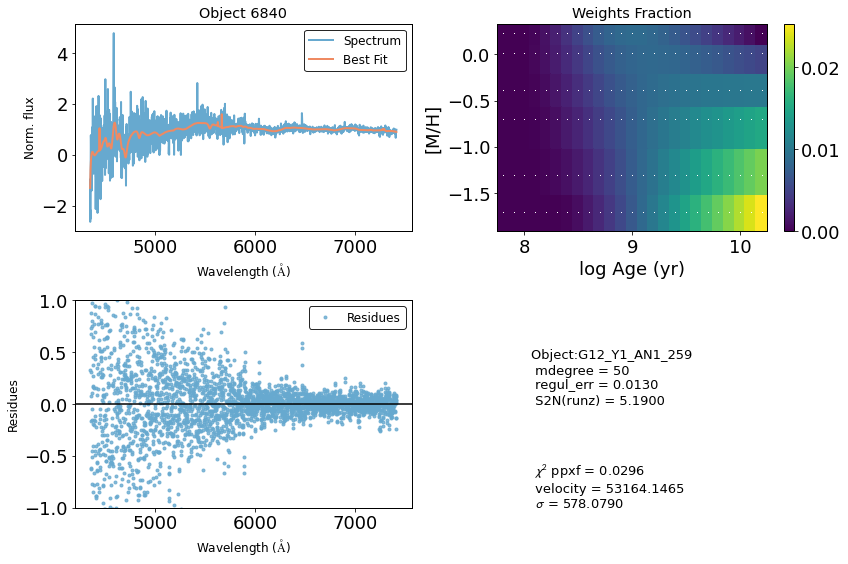

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ppxf/miles_util.py:169: RuntimeWarning: invalid value encountered in sqrt
  FWHM_dif = np.sqrt(FWHM_gal**2 - FWHM_tem**2)


Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d']


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     45615       400     0.000    -0.004
 comp.  1:     45217       503
 comp.  2:     45197        22
Gas Reddening E(B-V): 0.000
chi2/DOF: 0.004481
method = capfit; Jac calls: 19; Func calls: 1150; Status: 4
linear_method = nnls; Nonzero Templates (>0.1%):  18 / 153
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1       Unknown      2.629       7.2   45217   503
Comp:  2       Unknown     0.2985       2.3   45197    22
Comp:  2       Unknown          0       1.6   45197    22
---------------------------------------------------------
Weighted <logAge> [yr]: 8.05
Weighted <[M/H]>: -1.16
Weighted <logAge> [yr]: 8.05
Weighted <[M/H]>: -1.16
M/L_r: 0.1663
Current $\chi^2$: 0.0045
Elapsed time in PPXF: 7.42 [min]


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


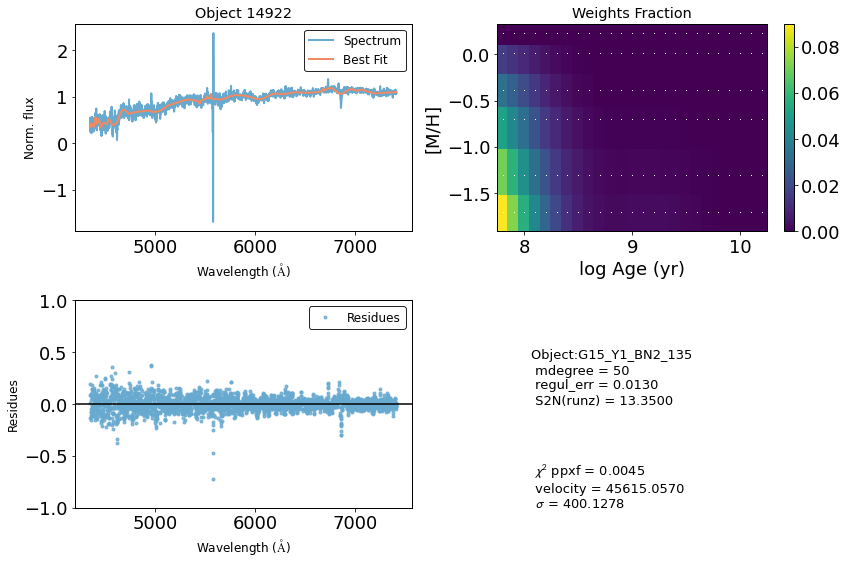

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ppxf/miles_util.py:169: RuntimeWarning: invalid value encountered in sqrt
  FWHM_dif = np.sqrt(FWHM_gal**2 - FWHM_tem**2)


Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d']


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     43238      1000    -0.155     0.104
 comp.  1:     41507       165
 comp.  2:     41884        92
Gas Reddening E(B-V): -0.000
chi2/DOF: 0.005608
method = capfit; Jac calls: 26; Func calls: 1569; Status: 4
linear_method = nnls; Nonzero Templates (>0.1%):  38 / 153
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1       Unknown      0.417       3.4   41507   165
Comp:  2       Unknown     0.6938       3.4   41884    92
Comp:  2       Unknown          0       1.9   41884    92
---------------------------------------------------------
Weighted <logAge> [yr]: 7.98
Weighted <[M/H]>: -0.455
Weighted <logAge> [yr]: 7.98
Weighted <[M/H]>: -0.455
M/L_r: 0.1774
Current $\chi^2$: 0.0056
Elapsed time in PPXF: 10.42 [min]


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


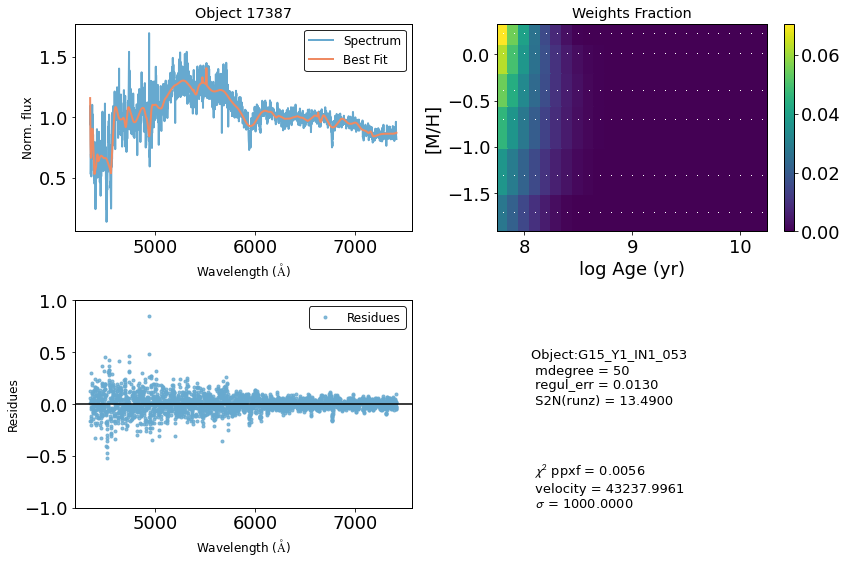

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ppxf/miles_util.py:169: RuntimeWarning: invalid value encountered in sqrt
  FWHM_dif = np.sqrt(FWHM_gal**2 - FWHM_tem**2)


Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     48810      1000     0.094     0.049
 comp.  1:     49650       172
 comp.  2:     49830         1
Gas Reddening E(B-V): 0.000
chi2/DOF: 0.01177
method = capfit; Jac calls: 11; Func calls: 671; Status: 4
linear_method = nnls; Nonzero Templates (>0.1%):  71 / 154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1       Unknown     0.7201       3.4   49650   172
Comp:  2       Unknown       1.19       4.3   49830     1
Comp:  2       Unknown     0.6757       3.1   49830     1
Comp:  2       Unknown          0       2.4   49830     1
---------------------------------------------------------
Weighted <logAge> [yr]: 9.84
Weighted <[M/H]>: -0.262
Weighted <logAge> [yr]: 9.84
Weighted <[M/H]>: -0.262
M/L_r: 2.671
Current $\chi^2$: 0.0118
Elapsed time in PPXF: 5.17 [min]


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


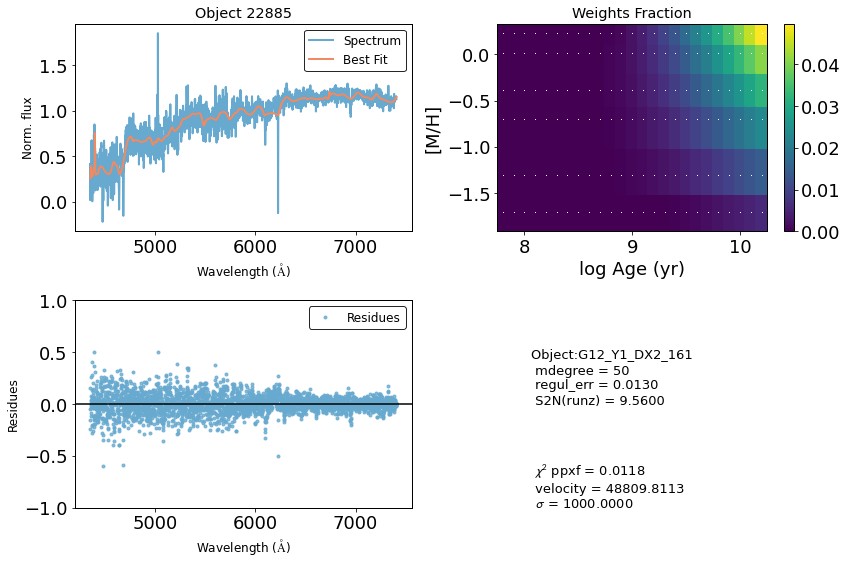

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ppxf/miles_util.py:169: RuntimeWarning: invalid value encountered in sqrt
  FWHM_dif = np.sqrt(FWHM_gal**2 - FWHM_tem**2)


Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     30135       270    -0.012    -0.008
 comp.  1:     31395      1000
 comp.  2:     31887        48
Gas Reddening E(B-V): 1.838
chi2/DOF: 0.003584
method = capfit; Jac calls: 14; Func calls: 853; Status: 3
linear_method = nnls; Nonzero Templates (>0.1%):  4 / 154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1       Unknown       3.32         7   31395  1000
Comp:  2       Unknown     0.5126       2.5   31887    48
Comp:  2       Unknown   0.008348         2   31887    48
Comp:  2       Unknown     0.1044       1.9   31887    48
---------------------------------------------------------
Weighted <logAge> [yr]: 9.84
Weighted <[M/H]>: -0.265
Weighted <logAge> [yr]: 9.84
Weighted <[M/H]>: -0.265
M/L_r: 2.694
Current $\chi^2$: 0.0036
Elapsed time in PPXF: 6.11 [min]


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


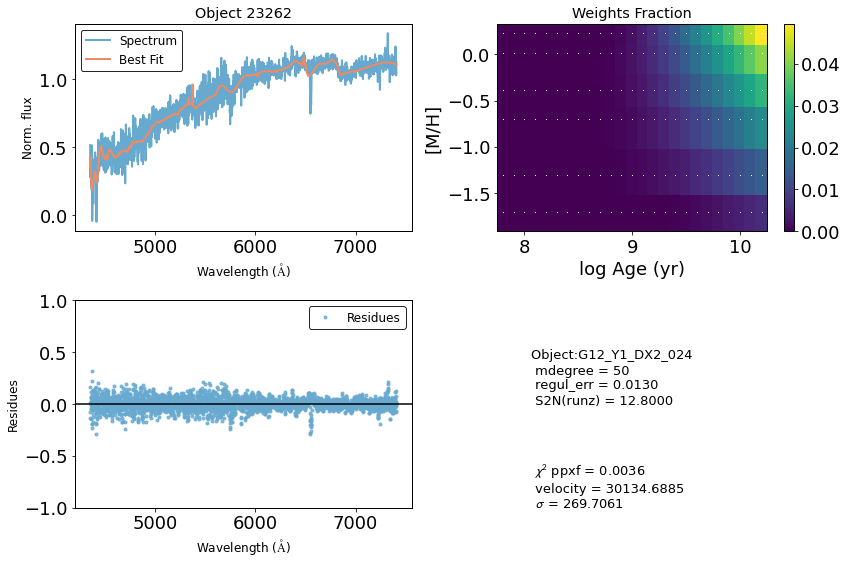

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ppxf/miles_util.py:169: RuntimeWarning: invalid value encountered in sqrt
  FWHM_dif = np.sqrt(FWHM_gal**2 - FWHM_tem**2)


Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d']


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     44515       963     0.037     0.022
 comp.  1:     44014       625
 comp.  2:     44225       184
Gas Reddening E(B-V): 0.056
chi2/DOF: 0.02932
method = capfit; Jac calls: 9; Func calls: 551; Status: 3
linear_method = nnls; Nonzero Templates (>0.1%):  75 / 153
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1       Unknown      7.911       6.8   44014   625
Comp:  2       Unknown     0.1839       4.2   44225   184
Comp:  2       Unknown     0.1212       2.7   44225   184
---------------------------------------------------------
Weighted <logAge> [yr]: 9.82
Weighted <[M/H]>: -0.25
Weighted <logAge> [yr]: 9.82
Weighted <[M/H]>: -0.25
M/L_r: 2.546
Current $\chi^2$: 0.0293
Elapsed time in PPXF: 4.06 [min]


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


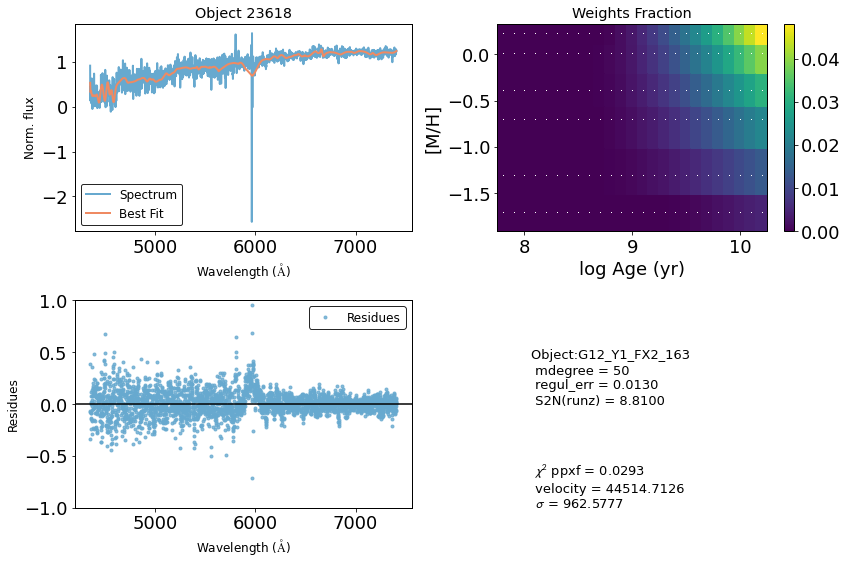

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ppxf/miles_util.py:169: RuntimeWarning: invalid value encountered in sqrt
  FWHM_dif = np.sqrt(FWHM_gal**2 - FWHM_tem**2)


Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     51168       631     0.007     0.002
 comp.  1:     50873       257
 comp.  2:     50911       280
Gas Reddening E(B-V): -0.000
chi2/DOF: 0.009996
method = capfit; Jac calls: 12; Func calls: 725; Status: 3
linear_method = nnls; Nonzero Templates (>0.1%):  31 / 154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1       Unknown     0.5145       4.5   50873   257
Comp:  2       Unknown          0        11   50911   280
Comp:  2       Unknown      12.26        11   50911   280
Comp:  2       Unknown     0.8124       5.7   50911   280
---------------------------------------------------------
Weighted <logAge> [yr]: 9.7
Weighted <[M/H]>: -0.195
Weighted <logAge> [yr]: 9.7
Weighted <[M/H]>: -0.195
M/L_r: 1.404
Current $\chi^2$: 0.0100
Elapsed time in PPXF: 6.41 [min]


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


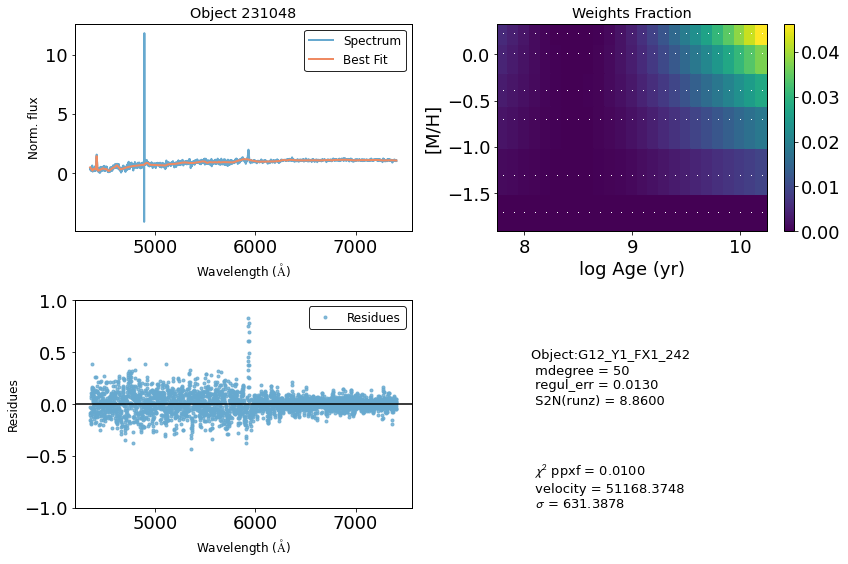

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ppxf/miles_util.py:169: RuntimeWarning: invalid value encountered in sqrt
  FWHM_dif = np.sqrt(FWHM_gal**2 - FWHM_tem**2)


Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     56423       451     0.012     0.005
 comp.  1:     56291       241
 comp.  2:     56467       179
Gas Reddening E(B-V): 0.000
chi2/DOF: 0.007391
method = capfit; Jac calls: 12; Func calls: 727; Status: 3
linear_method = nnls; Nonzero Templates (>0.1%):  23 / 154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1       Unknown      2.505       5.2   56291   241
Comp:  2       Unknown          0       7.2   56467   179
Comp:  2       Unknown          0       7.1   56467   179
Comp:  2       Unknown          0       5.4   56467   179
---------------------------------------------------------
Weighted <logAge> [yr]: 7.92
Weighted <[M/H]>: -1.11
Weighted <logAge> [yr]: 7.92
Weighted <[M/H]>: -1.11
M/L_r: 0.1585
Current $\chi^2$: 0.0074
Elapsed time in PPXF: 3.97 [min]


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


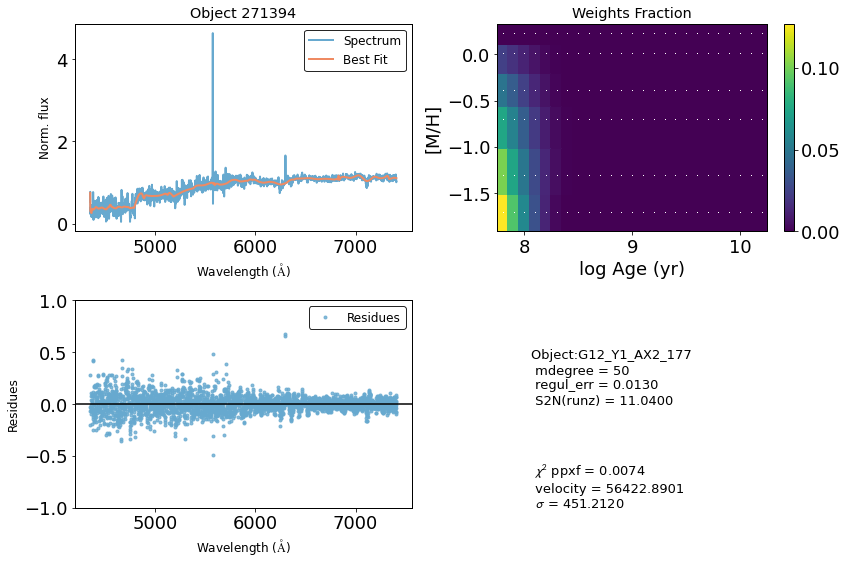

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ppxf/miles_util.py:169: RuntimeWarning: invalid value encountered in sqrt
  FWHM_dif = np.sqrt(FWHM_gal**2 - FWHM_tem**2)


Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d']


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     43923       180     0.000     0.000
 comp.  1:     43923       180
 comp.  2:     43923       180
Gas Reddening E(B-V): 0.000
chi2/DOF: 0.02125
method = capfit; Jac calls: 1; Func calls: 70; Status: 4
linear_method = nnls; Nonzero Templates (>0.1%):  4 / 153
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1       Unknown     0.8282       4.8   43923   180
Comp:  2       Unknown     0.7005         5   43923   180
Comp:  2       Unknown     0.3566       3.2   43923   180
---------------------------------------------------------
Weighted <logAge> [yr]: 7.87
Weighted <[M/H]>: -1.41
Weighted <logAge> [yr]: 7.87
Weighted <[M/H]>: -1.41
M/L_r: 0.1592
Current $\chi^2$: 0.0212
Elapsed time in PPXF: 0.36 [min]


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


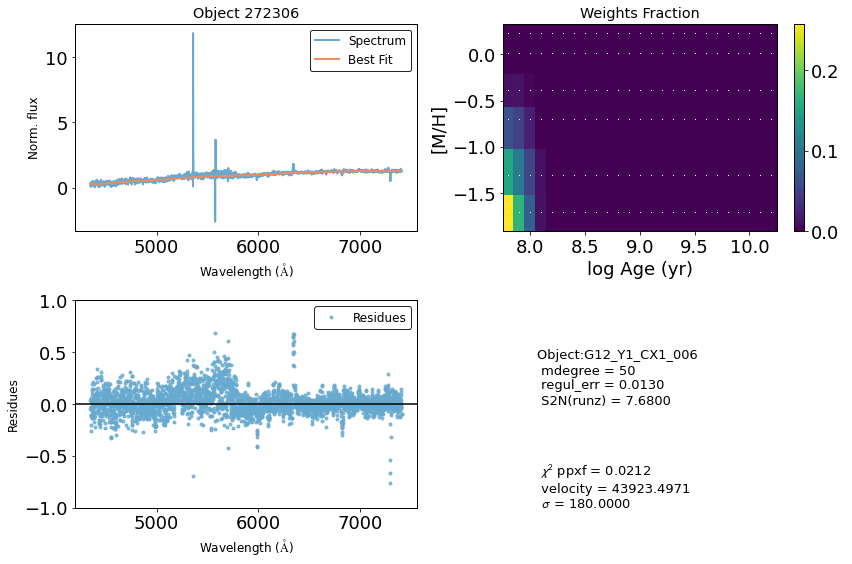

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ppxf/miles_util.py:169: RuntimeWarning: invalid value encountered in sqrt
  FWHM_dif = np.sqrt(FWHM_gal**2 - FWHM_tem**2)


Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     50765       436     0.001    -0.013
 comp.  1:     50743       157
 comp.  2:     51229       135
Gas Reddening E(B-V): 0.000
chi2/DOF: 0.004618
method = capfit; Jac calls: 13; Func calls: 785; Status: 3
linear_method = nnls; Nonzero Templates (>0.1%):  68 / 154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1       Unknown      1.291       4.1   50743   157
Comp:  2       Unknown      1.409       5.1   51229   135
Comp:  2       Unknown      1.092       5.1   51229   135
Comp:  2       Unknown     0.8285       3.9   51229   135
---------------------------------------------------------
Weighted <logAge> [yr]: 9.75
Weighted <[M/H]>: -0.193
Weighted <logAge> [yr]: 9.75
Weighted <[M/H]>: -0.193
M/L_r: 2.138
Current $\chi^2$: 0.0046
Elapsed time in PPXF: 6.31 [min]


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


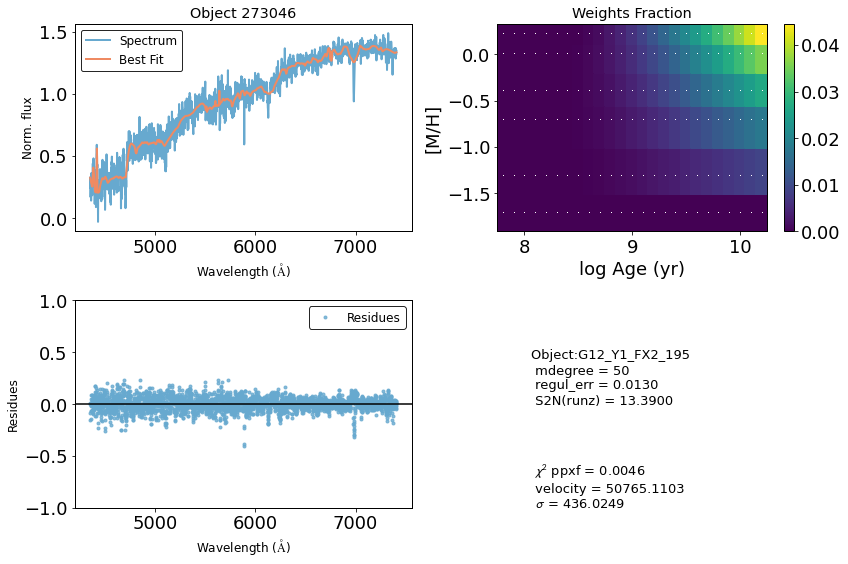

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ppxf/miles_util.py:169: RuntimeWarning: invalid value encountered in sqrt
  FWHM_dif = np.sqrt(FWHM_gal**2 - FWHM_tem**2)


Emission lines included in gas templates:
['Balmer' '[SII]6716' '[SII]6731' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     21592       184     0.011    -0.036
 comp.  1:     22481       177
 comp.  2:     22375       164
Gas Reddening E(B-V): -0.000
chi2/DOF: 0.004533
method = capfit; Jac calls: 17; Func calls: 1033; Status: 2
linear_method = nnls; Nonzero Templates (>0.1%):  45 / 156
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1       Unknown      0.879       5.1   22481   177
Comp:  2       Unknown   0.009205         2   22375   164
Comp:  2       Unknown     0.1909       2.1   22375   164
Comp:  2       Unknown          0       3.7   22375   164
Comp:  2       Unknown     0.5209       2.8   22375   164
Comp:  2       Unknown          0       2.5   22375   164
---------------------------------------------------------
Weighted <logAge> [yr]: 8.07
Weighted <[M/H]>: -0.55
Weighted <logAge> [yr]: 8.07
Weighted

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


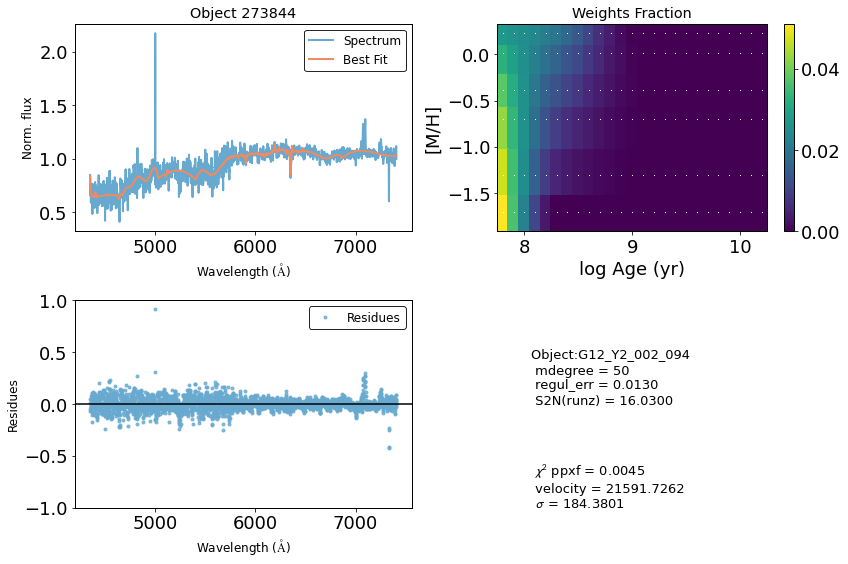

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ppxf/miles_util.py:169: RuntimeWarning: invalid value encountered in sqrt
  FWHM_dif = np.sqrt(FWHM_gal**2 - FWHM_tem**2)


Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d' '[OI]6300_d']


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     47110       840     0.017    -0.015
 comp.  1:     48143       322
 comp.  2:     48396       208
Gas Reddening E(B-V): 10.000
chi2/DOF: 0.004628
method = capfit; Jac calls: 25; Func calls: 1513; Status: 4
linear_method = nnls; Nonzero Templates (>0.1%):  2 / 155
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1       Unknown     0.7861         3   48143   322
Comp:  2       Unknown      402.7   5.7e+02   48396   208
Comp:  2       Unknown      406.9   5.7e+02   48396   208
Comp:  2       Unknown          0       5.1   48396   208
Comp:  2       Unknown     0.4121       3.6   48396   208
---------------------------------------------------------
Weighted <logAge> [yr]: 9.75
Weighted <[M/H]>: -0.345
Weighted <logAge> [yr]: 9.75
Weighted <[M/H]>: -0.345
M/L_r: 2.023
Current $\chi^2$: 0.0046
Ela

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


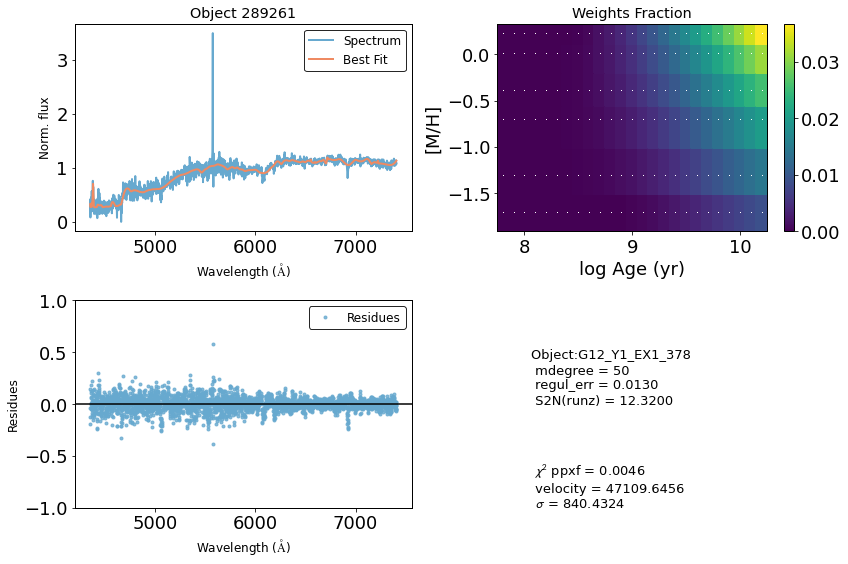

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ppxf/miles_util.py:169: RuntimeWarning: invalid value encountered in sqrt
  FWHM_dif = np.sqrt(FWHM_gal**2 - FWHM_tem**2)


Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     51254       662    -0.059    -0.032
 comp.  1:     51067       179
 comp.  2:     51270       165
Gas Reddening E(B-V): 2.553
chi2/DOF: 0.005127
method = capfit; Jac calls: 8; Func calls: 489; Status: 3
linear_method = nnls; Nonzero Templates (>0.1%):  2 / 154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1       Unknown          0       2.2   51067   179
Comp:  2       Unknown          0       5.5   51270   165
Comp:  2       Unknown      1.709       5.6   51270   165
Comp:  2       Unknown     0.9802       4.5   51270   165
---------------------------------------------------------
Weighted <logAge> [yr]: 9.09
Weighted <[M/H]>: -0.178
Weighted <logAge> [yr]: 9.09
Weighted <[M/H]>: -0.178
M/L_r: 0.6117
Current $\chi^2$: 0.0051
Elapsed time in PPXF: 4.12 [min]


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


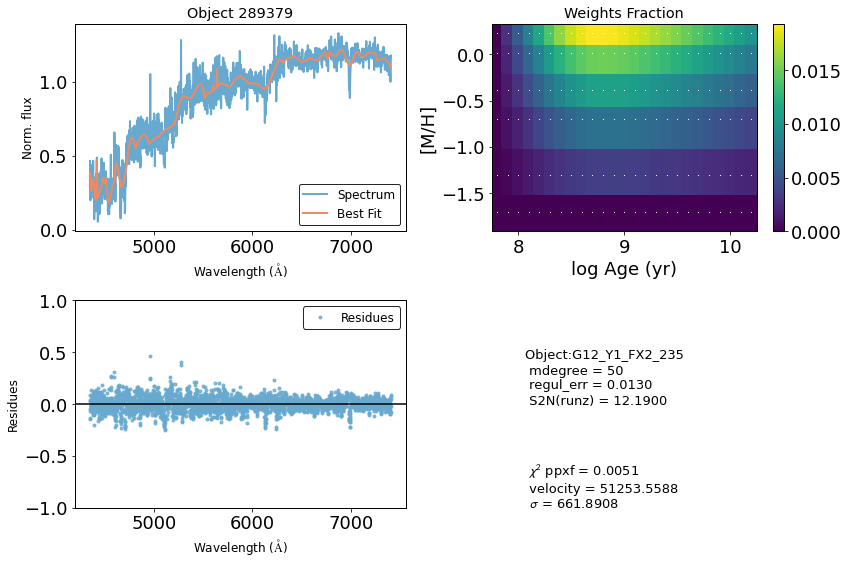

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ppxf/miles_util.py:169: RuntimeWarning: invalid value encountered in sqrt
  FWHM_dif = np.sqrt(FWHM_gal**2 - FWHM_tem**2)


Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     74838      1000     0.001    -0.002
 comp.  1:     73093      1000
 comp.  2:     73008       672
Gas Reddening E(B-V): -0.000
chi2/DOF: 0.01013
method = capfit; Jac calls: 20; Func calls: 1208; Status: 3
linear_method = nnls; Nonzero Templates (>0.1%):  4 / 154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1       Unknown      4.122       8.3   73093  1000
Comp:  2       Unknown      0.387        38   73008   672
Comp:  2       Unknown      3.264        38   73008   672
Comp:  2       Unknown     0.4987       6.4   73008   672
---------------------------------------------------------
Weighted <logAge> [yr]: 7.88
Weighted <[M/H]>: -1.12
Weighted <logAge> [yr]: 7.88
Weighted <[M/H]>: -1.12
M/L_r: 0.1572
Current $\chi^2$: 0.0101
Elapsed time in PPXF: 7.27 [min]


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


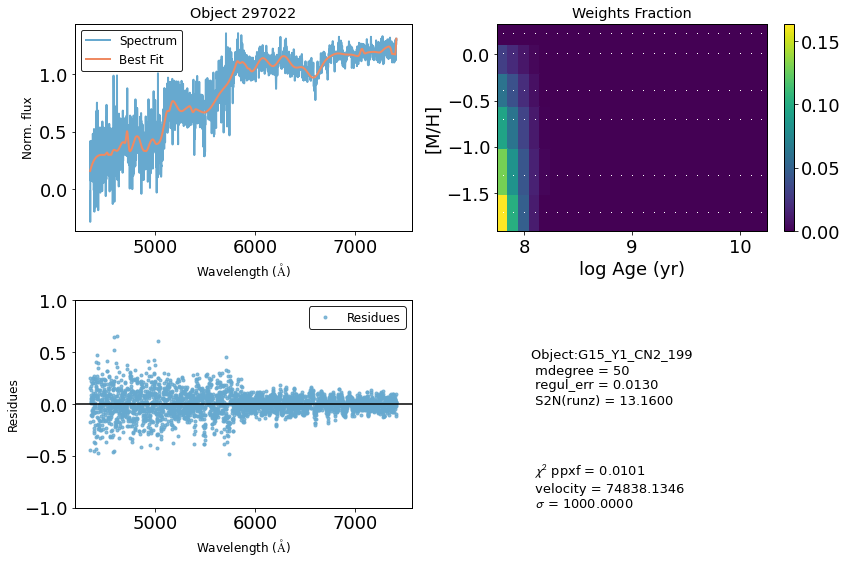

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ppxf/miles_util.py:169: RuntimeWarning: invalid value encountered in sqrt
  FWHM_dif = np.sqrt(FWHM_gal**2 - FWHM_tem**2)


Emission lines included in gas templates:
['Balmer' '[OII]3729' '[OIII]5007_d' '[OI]6300_d']


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     46365       222    -0.019     0.020
 comp.  1:     46207      1000
 comp.  2:     46325       180
Gas Reddening E(B-V): 0.000
chi2/DOF: 0.00365
method = capfit; Jac calls: 11; Func calls: 666; Status: 3
linear_method = nnls; Nonzero Templates (>0.1%):  46 / 154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1       Unknown      4.309       8.7   46207  1000
Comp:  2       Unknown     0.1202       4.8   46325   180
Comp:  2       Unknown          0       4.5   46325   180
Comp:  2       Unknown          0       2.5   46325   180
---------------------------------------------------------
Weighted <logAge> [yr]: 9.26
Weighted <[M/H]>: -1.14
Weighted <logAge> [yr]: 9.26
Weighted <[M/H]>: -1.14
M/L_r: 0.6308
Current $\chi^2$: 0.0036
Elapsed time in PPXF: 5.31 [min]


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


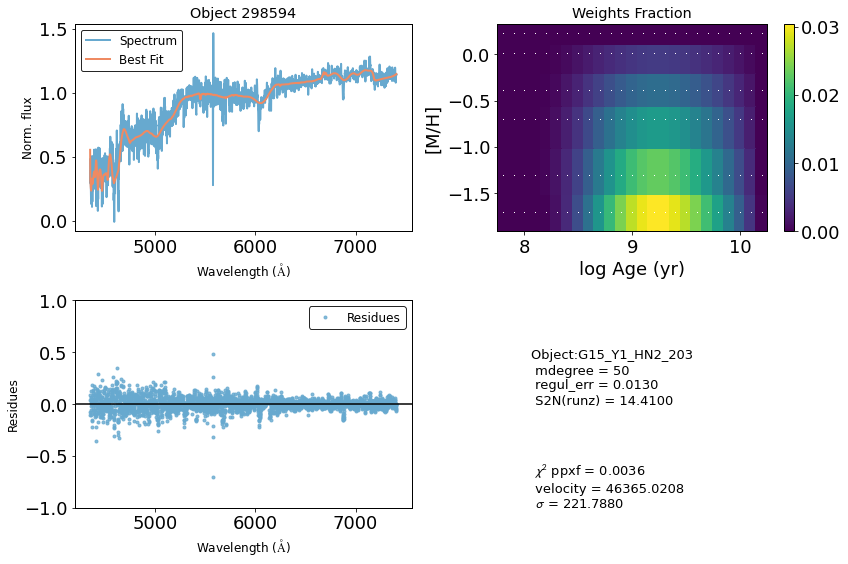

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ppxf/miles_util.py:169: RuntimeWarning: invalid value encountered in sqrt
  FWHM_dif = np.sqrt(FWHM_gal**2 - FWHM_tem**2)


Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     59569       785    -0.030     0.055
 comp.  1:     59436       353
 comp.  2:     60019        18
Gas Reddening E(B-V): -0.000
chi2/DOF: 0.01134
method = capfit; Jac calls: 10; Func calls: 610; Status: 3
linear_method = nnls; Nonzero Templates (>0.1%):  83 / 154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1       Unknown       4.12       7.1   59436   353
Comp:  2       Unknown          0       2.5   60019    18
Comp:  2       Unknown     0.1807       2.5   60019    18
Comp:  2       Unknown      0.391       2.5   60019    18
---------------------------------------------------------
Weighted <logAge> [yr]: 9.74
Weighted <[M/H]>: -0.226
Weighted <logAge> [yr]: 9.74
Weighted <[M/H]>: -0.226
M/L_r: 2.053
Current $\chi^2$: 0.0113
Elapsed time in PPXF: 4.99 [min]


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


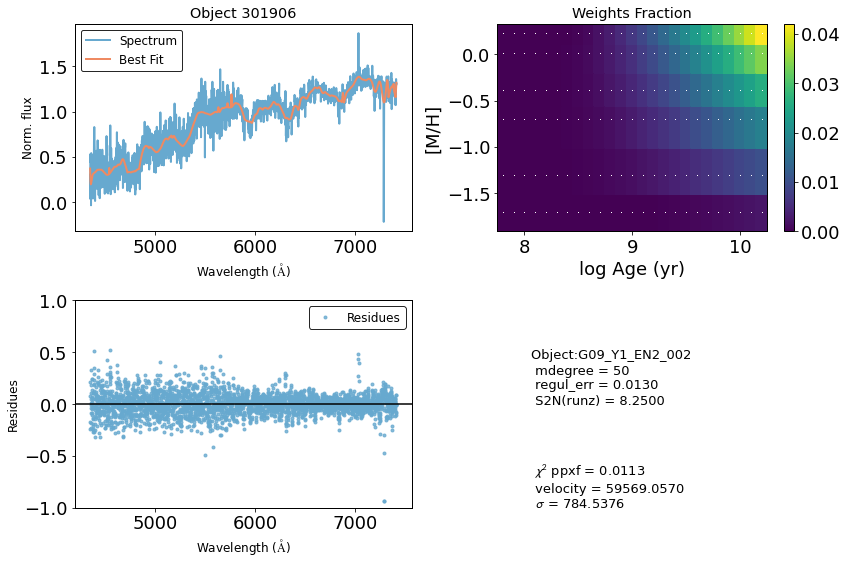

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ppxf/miles_util.py:169: RuntimeWarning: invalid value encountered in sqrt
  FWHM_dif = np.sqrt(FWHM_gal**2 - FWHM_tem**2)


Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     35953       748     0.033    -0.097
 comp.  1:     35252        89
 comp.  2:     35786      1000
Gas Reddening E(B-V): -0.000
chi2/DOF: 0.003052
method = capfit; Jac calls: 25; Func calls: 1507; Status: 2
linear_method = nnls; Nonzero Templates (>0.1%):  12 / 154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1       Unknown     0.5924       3.1   35252    89
Comp:  2       Unknown      2.332       8.6   35786  1000
Comp:  2       Unknown    0.01707       6.4   35786  1000
Comp:  2       Unknown       5.06       5.9   35786  1000
---------------------------------------------------------
Weighted <logAge> [yr]: 7.97
Weighted <[M/H]>: -1.08
Weighted <logAge> [yr]: 7.97
Weighted <[M/H]>: -1.08
M/L_r: 0.1617
Current $\chi^2$: 0.0031
Elapsed time in PPXF: 12.54 [min]


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


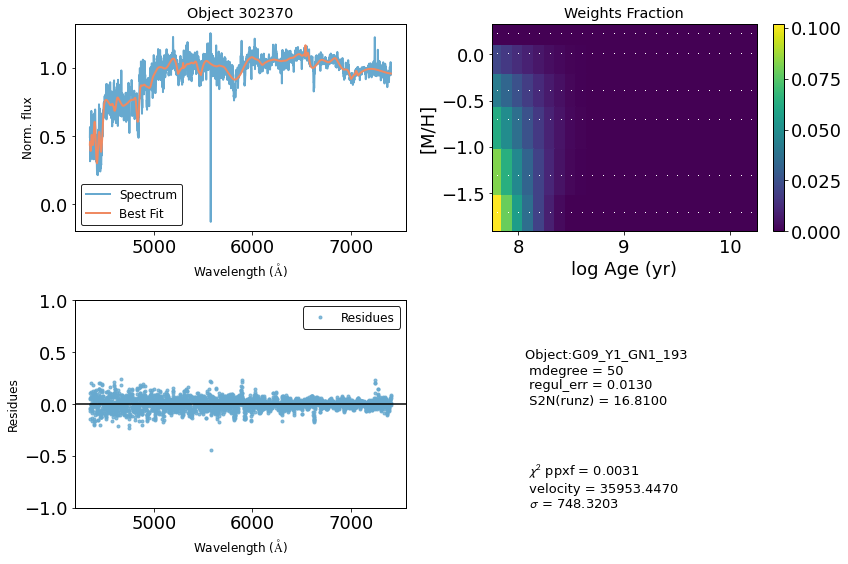

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ppxf/miles_util.py:169: RuntimeWarning: invalid value encountered in sqrt
  FWHM_dif = np.sqrt(FWHM_gal**2 - FWHM_tem**2)


Emission lines included in gas templates:
['Balmer' '[OII]3729' '[OIII]5007_d' '[OI]6300_d']


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     46148       539     0.011     0.001
 comp.  1:     46323       451
 comp.  2:     46913         4
Gas Reddening E(B-V): 0.000
chi2/DOF: 0.007273
method = capfit; Jac calls: 13; Func calls: 786; Status: 3
linear_method = nnls; Nonzero Templates (>0.1%):  76 / 154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1       Unknown      3.446       6.1   46323   451
Comp:  2       Unknown          0       3.1   46913     4
Comp:  2       Unknown      1.281         3   46913     4
Comp:  2       Unknown     0.2311       1.5   46913     4
---------------------------------------------------------
Weighted <logAge> [yr]: 9.58
Weighted <[M/H]>: -0.215
Weighted <logAge> [yr]: 9.58
Weighted <[M/H]>: -0.215
M/L_r: 1.279
Current $\chi^2$: 0.0073
Elapsed time in PPXF: 6.79 [min]


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


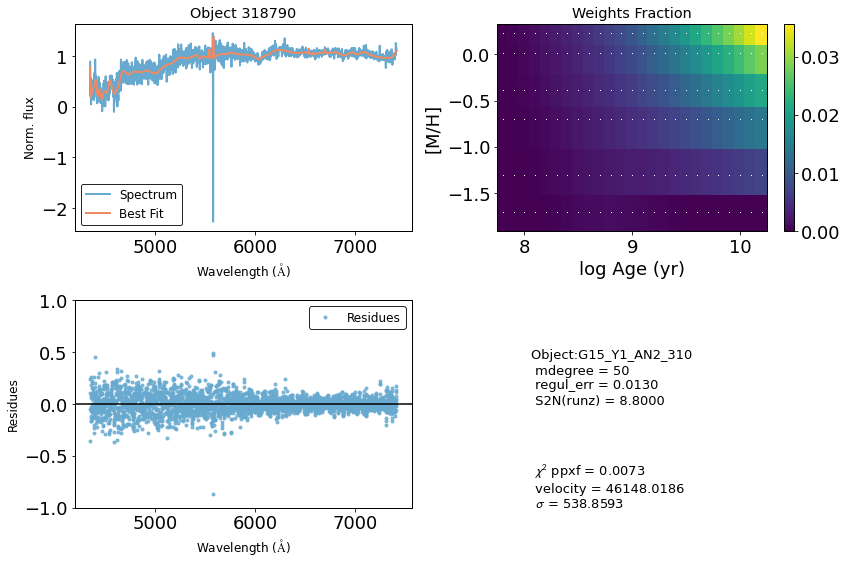

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ppxf/miles_util.py:169: RuntimeWarning: invalid value encountered in sqrt
  FWHM_dif = np.sqrt(FWHM_gal**2 - FWHM_tem**2)


Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d']


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     35139       905     0.016    -0.003
 comp.  1:     36579       409
 comp.  2:     36610        72
Gas Reddening E(B-V): 8.925
chi2/DOF: 0.05146
method = capfit; Jac calls: 16; Func calls: 968; Status: 3
linear_method = nnls; Nonzero Templates (>0.1%):  1 / 153
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1       Unknown     0.4291       3.8   36579   409
Comp:  2       Unknown       2.32       2.6   36610    72
Comp:  2       Unknown          0       2.1   36610    72
---------------------------------------------------------
Weighted <logAge> [yr]: 9.78
Weighted <[M/H]>: -0.259
Weighted <logAge> [yr]: 9.78
Weighted <[M/H]>: -0.259
M/L_r: 2.246
Current $\chi^2$: 0.0515
Elapsed time in PPXF: 6.91 [min]


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


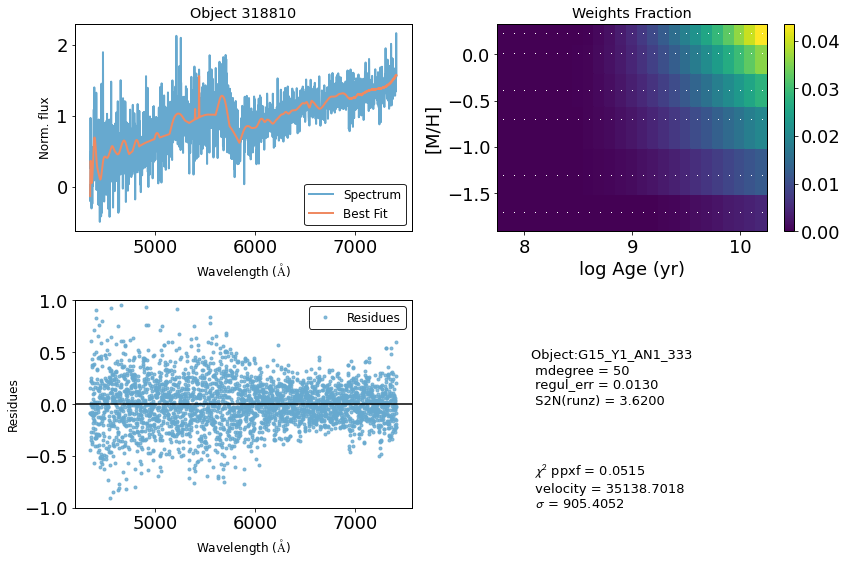

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ppxf/miles_util.py:169: RuntimeWarning: invalid value encountered in sqrt
  FWHM_dif = np.sqrt(FWHM_gal**2 - FWHM_tem**2)


Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d']


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     46148       539    -0.042    -0.003
 comp.  1:     46042       694
 comp.  2:     46019       180
Gas Reddening E(B-V): -0.000
chi2/DOF: 0.003426
method = capfit; Jac calls: 7; Func calls: 430; Status: 3
linear_method = nnls; Nonzero Templates (>0.1%):  28 / 153
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1       Unknown      5.937       8.5   46042   694
Comp:  2       Unknown          0       4.3   46019   180
Comp:  2       Unknown          0         3   46019   180
---------------------------------------------------------
Weighted <logAge> [yr]: 8.74
Weighted <[M/H]>: -0.846
Weighted <logAge> [yr]: 8.74
Weighted <[M/H]>: -0.846
M/L_r: 0.3545
Current $\chi^2$: 0.0034
Elapsed time in PPXF: 3.14 [min]


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


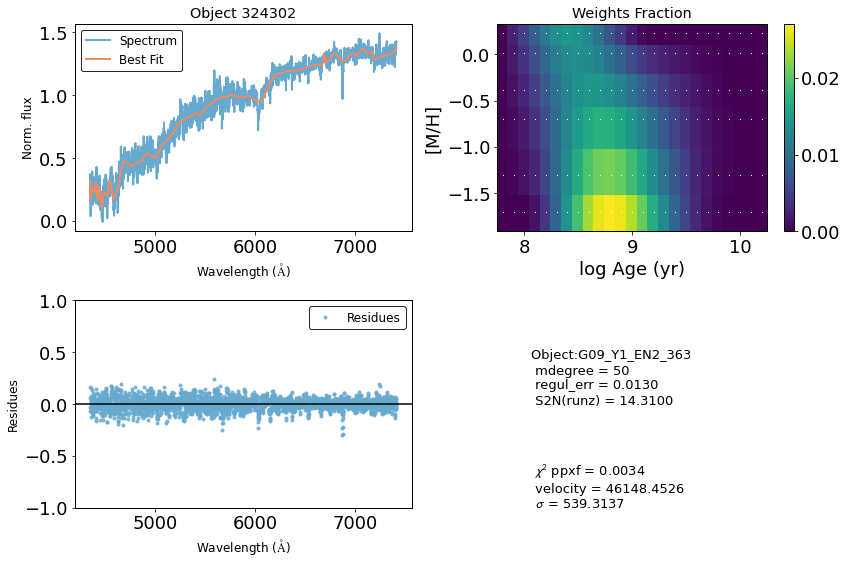

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ppxf/miles_util.py:169: RuntimeWarning: invalid value encountered in sqrt
  FWHM_dif = np.sqrt(FWHM_gal**2 - FWHM_tem**2)


Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d']


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     41924       678     0.024    -0.025
 comp.  1:     41820       401
 comp.  2:     41258       180
Gas Reddening E(B-V): 0.125
chi2/DOF: 0.01064
method = capfit; Jac calls: 12; Func calls: 731; Status: 3
linear_method = nnls; Nonzero Templates (>0.1%):  71 / 153
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1       Unknown          0       5.6   41820   401
Comp:  2       Unknown          0         4   41258   180
Comp:  2       Unknown          0       2.8   41258   180
---------------------------------------------------------
Weighted <logAge> [yr]: 8.33
Weighted <[M/H]>: -0.305
Weighted <logAge> [yr]: 8.33
Weighted <[M/H]>: -0.305
M/L_r: 0.2661
Current $\chi^2$: 0.0106
Elapsed time in PPXF: 5.15 [min]


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


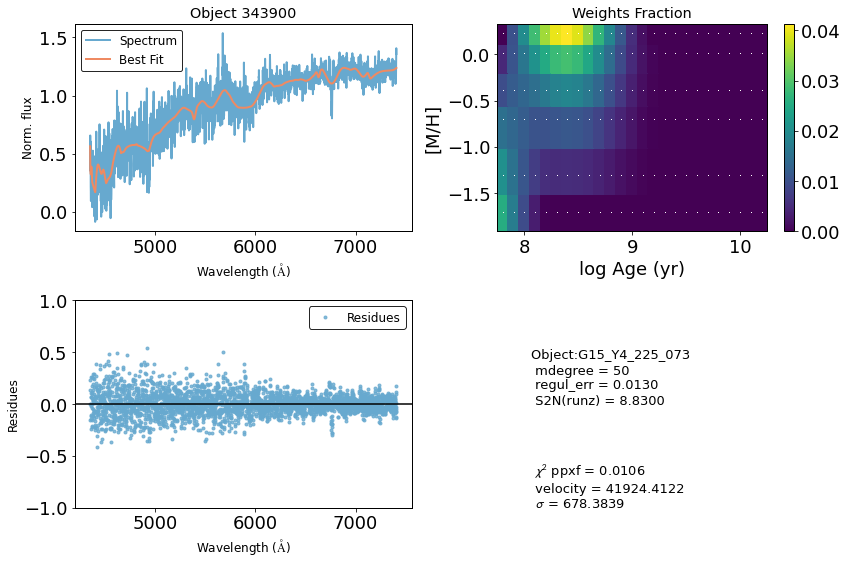

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ppxf/miles_util.py:169: RuntimeWarning: invalid value encountered in sqrt
  FWHM_dif = np.sqrt(FWHM_gal**2 - FWHM_tem**2)


Emission lines included in gas templates:
['Balmer' '[SII]6716' '[SII]6731' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     26918         1     0.002    -0.000
 comp.  1:     26961       329
 comp.  2:     26905        80
Gas Reddening E(B-V): 10.000
chi2/DOF: 0.009522
method = capfit; Jac calls: 15; Func calls: 909; Status: 4
linear_method = nnls; Nonzero Templates (>0.1%):  3 / 156
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1       Unknown      1.611       2.8   26961   329
Comp:  2       Unknown    0.03413       1.5   26905    80
Comp:  2       Unknown     0.2975       1.5   26905    80
Comp:  2       Unknown     0.1283       2.7   26905    80
Comp:  2       Unknown     0.9255       2.5   26905    80
Comp:  2       Unknown          0       1.8   26905    80
---------------------------------------------------------
Weighted <logAge> [yr]: 8.85
Weighted <[M/H]>: -0.381
Weighted <logAge> [yr]: 8.85
Weighted 

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


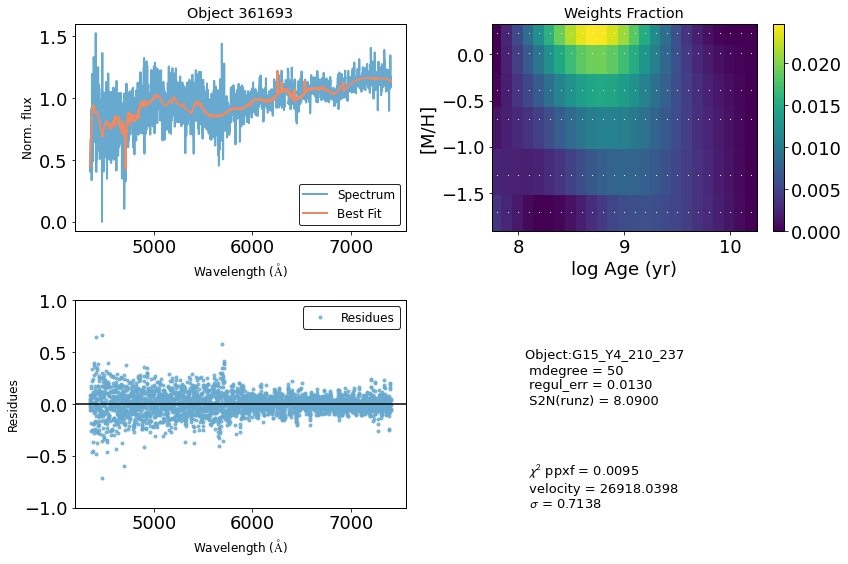

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ppxf/miles_util.py:169: RuntimeWarning: invalid value encountered in sqrt
  FWHM_dif = np.sqrt(FWHM_gal**2 - FWHM_tem**2)


Emission lines included in gas templates:
['Balmer' '[OIII]5007_d' '[OI]6300_d' '[NII]6583_d']


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


 Best Fit:       Vel     sigma        h3        h4
 comp.  0:     35600       291    -0.008    -0.020
 comp.  1:     34555       180
 comp.  2:     34497       178
Gas Reddening E(B-V): 9.950
chi2/DOF: 0.006334
method = capfit; Jac calls: 22; Func calls: 1332; Status: 3
linear_method = nnls; Nonzero Templates (>0.1%):  1 / 154
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component   name       flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1       Unknown          0       2.4   34555   180
Comp:  2       Unknown      1.453       3.6   34497   178
Comp:  2       Unknown          0       3.8   34497   178
Comp:  2       Unknown          0       2.7   34497   178
---------------------------------------------------------
Weighted <logAge> [yr]: 7.88
Weighted <[M/H]>: -1.2
Weighted <logAge> [yr]: 7.88
Weighted <[M/H]>: -1.2
M/L_r: 0.1577
Current $\chi^2$: 0.0063
Elapsed time in PPXF: 7.02 [min]


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


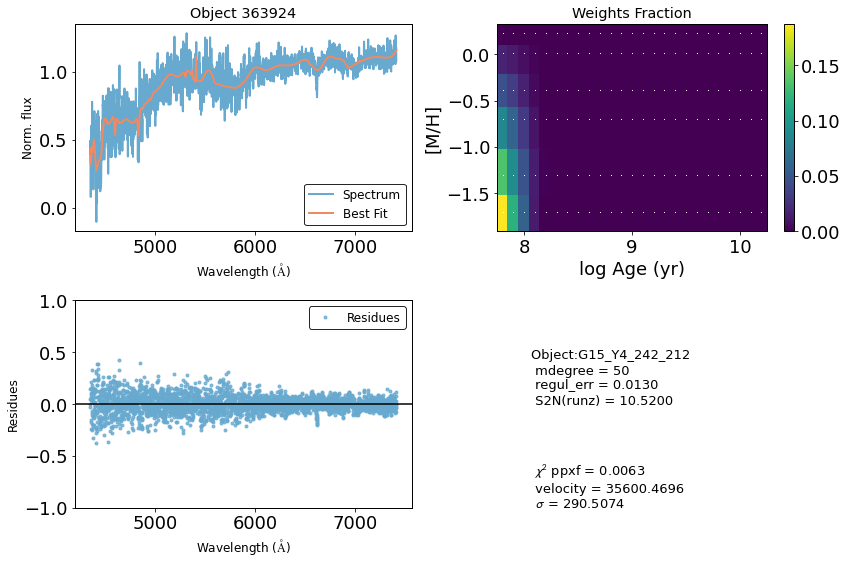

/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater
/home/mlldantas/anaconda3/lib/python3.7/site-packages/ppxf/miles_util.py:169: RuntimeWarning: invalid value encountered in sqrt
  FWHM_dif = np.sqrt(FWHM_gal**2 - FWHM_tem**2)


Emission lines included in gas templates:
['Balmer' '[OII]3726' '[OII]3729' '[OIII]5007_d']


/home/mlldantas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:95: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [ ]:
for each_sed in range(len(seds_list)):
    
    # settings for the prgress bar widget above: does not influence in ppxf -----------------------------------------
    bar.value += each_sed/2.                                          # signal to increment the progress bar
    if each_sed<len(seds_list): 
        bar.bar_style = ""                                            # blue when in progress
    else: 
        bar.bar_style = "success"                                     # green when it finishes        
        
    # flux -----------------------------------------------------------------------------------------------------------
    sed_file  = os.path.join(seds_path, seds_list[each_sed])          # link between path and files
    sed_flux  = pf.getdata(sed_file)[0]                               # opening each spectra
    sed_err   = pf.getdata(sed_file)[1]                               # opening each spectra error
    
    # wavelength -----------------------------------------------------------------------------------------------------
    sed_header = pf.open(sed_file)[0].header
    sed_wl_ini = sed_header['WMIN'] 
    sed_wl_stp = sed_header['CD1_1']
    sed_wl     = np.arange(sed_flux.size)*(sed_wl_stp)+sed_wl_ini     # sed wavelength    
#     plot_sed(sed_wl, sed_flux, sed_err)
    
    # cleaning flux and wavelength trash -----------------------------------------------------------------------------
    idx_clean       = np.where((np.logical_not(np.isnan(sed_flux)))*(sed_err>0))    # indices where NAN is present
    flux_temp       = sed_flux[idx_clean]                                           # removing NAN values from spectra
    flux_temp_err   = sed_err[idx_clean]
    wavelength_temp = sed_wl[idx_clean]    
#     plot_sed(wavelength_temp, flux_temp, flux_temp_err)
    
    # limiting the spectrum regarding the wavelength range of the library --------------------------------------------
    wl_lib_idx = (wavelength_temp>wl_min) & (wavelength_temp<wl_max)       # MILES wavelength range
    flux       = flux_temp[wl_lib_idx]
    flux_err   = flux_temp_err[wl_lib_idx]
    wavelength = wavelength_temp[wl_lib_idx]    
#     plot_sed(wavelength, flux, flux_err)    
    
    # other important parameters -------------------------------------------------------------------------------------
    redshift  = sed_header['Z']
    cataid    = sed_header['CATAID']
    fwhm_gama = 2.
#     print(wavelength, gama_resol)
#     fwhm_gama = wavelength*gama_resol
#     print(len(fwhm_gama))
    
#     # ppxf ---------------------------------------------------------------------------------------------------------
    vel_scale  = light_speed*np.log(wavelength[1]/wavelength[0])      # velocity scale - Eq.8 Capellari 2017
    
#     ### setup templates --------------------------------------------------------------------------------------------
#     #### stellar pops ----------------------------------------------------------------------------------------------
    miles = lib.miles(miles_lib, vel_scale, fwhm_gama)
#     print(miles)
#     print("All ok here %s" %cataid)
    stellar_templates  = miles.templates.reshape(miles.templates.shape[0], -1)
    reg_dim            = miles.templates.shape[1:]
    dv                 = light_speed*(miles.log_lam_temp[0] - np.log(wavelength[0]))  # eq.(8) of Cappellari (2017)
    vel                = light_speed*np.log(1 + redshift)                             # eq.(8) of Cappellari (2017)
    start              = [vel, 180.]
    
    #### gas templates -----------------------------------------------------------------------------------------------
    wl_range_galaxy = np.array([np.min(wavelength), np.max(wavelength)])/(1 + redshift)
    gas_templates, gas_names, line_wave = util.emission_lines(miles.log_lam_temp, wl_range_galaxy, fwhm_gama, 
                                                              tie_balmer=tied_balmer, limit_doublets=limit_doublets)
    number_of_templates = stellar_templates.shape[1]
    number_of_forbidden = np.sum(["[" in a for a in gas_names])                      # forbidden lines contain "[*]"
    number_of_balmer    = len(gas_names) - number_of_forbidden
        
    component = (stellar_comp_w*number_of_templates)+(balmer_comp_w*number_of_balmer)+(forbid_comp_w
                                                                                       *number_of_forbidden)
        
    gas_component = np.array(component) > 0       # gas_component=True for gas templates
    start3        = [start, start, start]         # adopt the same starting value for the 3 components
    gas_reddening = 0 if tied_balmer else None    # If the Balmer lines are tied one should allow for gas reddening.
    
    
    #### all templates -----------------------------------------------------------------------------------------------
    all_templates = np.column_stack([stellar_templates, gas_templates])
    
    ### rebinning the spectrum so it is at the same size as the templates (or smaller) -------------------------------
    new_shape          = stellar_templates[:,0].shape
    rebinning_function = sci.interp1d(wavelength, flux)   # for the flux
    wavelength_rebin   = np.linspace(start=wavelength.min(), stop=wavelength.max(), num=int(new_shape[0]))
    flux_rebin         = rebinning_function(wavelength_rebin)
    
    ### rebinning the error ------------------------------------------------------------------------------------------
    rebin_func_error   = sci.interp1d(wavelength, flux_err)
    wl_rebin_error     = np.linspace(start=wavelength.min(), stop=wavelength.max(), num=int(new_shape[0]))
    flux_err_rebin     = rebin_func_error(wavelength_rebin)
    
    ### final galaxy spectrum and its error to be analysed -----------------------------------------------------------
    galaxy             = flux_rebin/np.median(flux_rebin)               # Normalize spectrum to avoid numerical issues
    noise              = flux_err_rebin/np.median(flux_err_rebin)       # idem
    
#     plot_sed(wavelength_rebin, galaxy, noise)    
    
    ### SED FITTING WITH PPXF ----------------------------------------------------------------------------------------
    start_time = time.clock()
    sed_fit = ppxf(templates=all_templates, galaxy=galaxy, noise=noise, velscale=vel_scale, start=start3, plot=False, 
                   lam=wavelength_rebin, moments=moments, degree=degree, mdegree=mdegree, regul=1./regul_err, 
                   reg_dim=reg_dim, vsyst=dv, clean=False, component=component, gas_component=gas_component,
                   gas_reddening=gas_reddening)
    end_time = time.clock()
    
    ## output parameters -- most of them will become a dataframe at the end of the script  
    residues = (galaxy-sed_fit.bestfit)
    
    stellar_weights = sed_fit.weights[~gas_component]                         # Exclude weights of the gas templates
    stellar_weights = stellar_weights.reshape(reg_dim)/stellar_weights.sum()  # Normalized
    
    velocity = sed_fit.sol[0][0]
    sigma    = sed_fit.sol[0][1]
    
    mean_age.append(miles.mean_age_metal(stellar_weights)[0])
    mean_metal.append(miles.mean_age_metal(stellar_weights)[1])
    mass2light.append(miles.mass_to_light(stellar_weights, band="r"))
    ids.append(cataid)
    redshifts.append(redshift)
       
    print(r"Current $\chi^2$: %.4f" % (sed_fit.chi2))
    print('Elapsed time in PPXF: %.2f [min]' % ((end_time-start_time)/60))
    
    ### Saving fit results -------------------------------------------------------------------------------------------
    output = {}
    output['wavelength'] = wavelength_rebin
    output['flux']       = sed_fit.galaxy
    output['best_fit']   = sed_fit.bestfit
    
    output_df = pd.DataFrame(output)
    output_df.to_csv(os.path.join(output_path, 'fit_'+str(cataid)+'_d'+str(degree)+'_m'+str(mdegree)+'_'+str(wl_min)
                                  +'.csv'), index=False)

    ### Saving plots -------------------------------------------------------------------------------------------------
    plt.subplots(figsize=(12,8))
    
    #### plot01 ------------------------------------------------------------------------------------------------------
    plt.subplot(2,2,1)
    plt.plot(wavelength_rebin, sed_fit.galaxy, '-', color=palette[-1], linewidth=lw, label="Spectrum")
    plt.plot(wavelength_rebin, sed_fit.bestfit, '-', color=palette[0], linewidth=lw, label="Best Fit")
    plt.title("Object %s" % (cataid))
    plt.legend(loc='best')
    plt.xlabel("Wavelength ($\mathrm{\AA}$)", fontsize=12)
    plt.ylabel("Norm. flux", fontsize=12)
    
    #### plot02 ------------------------------------------------------------------------------------------------------
    plt.subplot(2,2,2)
    miles.plot(stellar_weights)
    
    #### plot03 ------------------------------------------------------------------------------------------------------
    plt.subplot(2,2,3)
    plt.plot(wavelength_rebin, residues, '.', color=palette[-1], linewidth=lw, label="Residues", alpha=transparency)
    plt.axhline(y=0, c='black')
    plt.legend(loc='best')
    plt.xlabel("Wavelength ($\mathrm{\AA}$)", fontsize=12)
    plt.ylabel("Residues", fontsize=12)
    plt.ylim([-1,1])
    
    #### plot04 ------------------------------------------------------------------------------------------------------
    plt.subplot(2,2,4)
    plt.text(0.1, 0.5, "Object:{:s} \n mdegree = {:d} \n regul_err = {:.4f}\n S2N(runz) = {:.4f}"
             .format(sed_header['SPECID'], mdegree, regul_err, sed_header['SN']), fontsize=13)
    plt.text(0.1, 0.0, " \n $\chi^2$ ppxf = {:.4f} \n velocity = {:.4f} \n $\sigma$ = {:.4f}"
             .format(sed_fit.chi2, velocity, sigma), fontsize=13)
    plt.axis('off') 
    
    plt.tight_layout()
    plt.savefig(os.path.join(output_path, 'gal_'+str(cataid)+'_d'+str(degree)+'_m'+str(mdegree)+'_'+str(wl_min)+'.png'))
    plt.show()